In [1]:
pip install pyodbc pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyodbc
import pandas as pd

conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=SWASTISPC;'
    'DATABASE=BoardGameDB1;'
    'Trusted_Connection=yes;'
)

In [3]:
print(pyodbc.drivers())

['SQL Server', 'ODBC Driver 17 for SQL Server', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)', 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)']


In [4]:
cursor = conn.cursor()
cursor.execute("SELECT * FROM BoardGames")

In [5]:
rows = cursor.fetchall()
columns = [column[0] for column in cursor.description]
df = pd.DataFrame.from_records(rows, columns=columns)

In [6]:
df.head()

,row_id,boardgame,release_year,min_players,max_players,min_playtime,max_playtime,minimum_age,avg_rating,num_ratings,complexity,rank_overall,owned,wishlisted,total_plays,fans,page_views,description,players_range,playtime_range
0,1,Brass: Birmingham,2018,2,4,60,120,14,8.57,53548,3.87,1,76201,20334,152594,6726,5555379,"Build networks, grow industries, and navigate ...",2,60
1,2,Pandemic Legacy: Season 1,2015,2,4,60,60,13,8.51,56071,2.83,2,87378,14478,301410,4221,4592660,Mutating diseases are spreading around the wor...,2,0
2,3,Ark Nova,2021,1,4,90,150,14,8.54,54528,3.79,3,79476,16121,528979,7465,6113759,"Plan and build a modern, scientifically manage...",3,60
3,4,Gloomhaven,2017,1,4,60,120,14,8.56,65443,3.92,4,101913,21597,542336,10780,13606453,Vanquish monsters with strategic cardplay. Ful...,3,60
4,5,Twilight Imperium: Fourth Edition,2017,3,6,240,480,14,8.57,26686,4.34,5,32012,12449,49484,3546,4354588,"Build an intergalactic empire through trade, r...",3,240


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          1991 non-null   int64  
 1   boardgame       1991 non-null   object 
 2   release_year    1991 non-null   int64  
 3   min_players     1991 non-null   int64  
 4   max_players     1991 non-null   int64  
 5   min_playtime    1991 non-null   int64  
 6   max_playtime    1991 non-null   int64  
 7   minimum_age     1991 non-null   int64  
 8   avg_rating      1991 non-null   float64
 9   num_ratings     1991 non-null   int64  
 10  complexity      1991 non-null   float64
 11  rank_overall    1991 non-null   int64  
 12  owned           1991 non-null   int64  
 13  wishlisted      1991 non-null   int64  
 14  total_plays     1991 non-null   int64  
 15  fans            1991 non-null   int64  
 16  page_views      1991 non-null   int64  
 17  description     1991 non-null   o

## Question 1: Boardgame with Highest Page Views

In [8]:
top_game = df.nlargest(1, 'page_views')
print(top_game.iloc[0]['boardgame'], "has the highest number of page_views.")

Gloomhaven has the highest number of page_views.


## Question 2: Average Playtime (Min and Max) Across All Games

In [9]:
avg_times = df[['min_playtime', 'max_playtime']].mean().round(2)
print("Average Min Playtime is:", avg_times['min_playtime'])
print("Average Max Playtime is:", avg_times['max_playtime'])

Average Min Playtime is: 57.32
Average Max Playtime is: 88.65


## Question 3: Release Year with Maximum Number of Boardgames

In [10]:
counts = df['release_year'].value_counts()
year = counts.index[0]
count = counts.values[0]

print(year, "had the highest number of boardgames with", count, "releases.")

2019 had the highest number of boardgames with 152 releases.


## Question 4: Creating a new Column named Playtime_range and finding Top 5 Games with the Largest Playtime Range

In [11]:
df['playtime_range'] = df['max_playtime'] - df['min_playtime']

largest_playtime = df[['boardgame', 'playtime_range']].nlargest(5, 'playtime_range')
print(largest_playtime.reset_index(drop=True))

                            boardgame  playtime_range
0             The Civil War 1861-1865            1080
1                   The 7th Continent             995
2                     The 7th Citadel             995
3  The 7th Continent: Classic Edition             995
4                Legacy of Dragonholt             939


## Question 5: Average Rating of Games with Minimum Age <= 10

In [12]:
avg_rating = round(df[df['minimum_age'] <= 10]['avg_rating'].mean(),2)
print('The average rating of games with minimum_age ≤ 10 is:',avg_rating)

The average rating of games with minimum_age ≤ 10 is: 7.23


## Question 6: Game with the Highest Owned Count

In [13]:
high_owned_count = df[['boardgame', 'owned']].nlargest(1, 'owned').reset_index(drop=True)
print('The highest owned game is:')
print(high_owned_count)

The highest owned game is:
  boardgame   owned
0     CATAN  226927


## Question 7: Summary Statistics (Mean, Min, Max) of Average Rating

In [14]:
mean_rating = round(df['avg_rating'].mean(),2)
min_rating = round(df['avg_rating'].min(),2)
max_rating = round(df['avg_rating'].max(),2)

print(f'Mean rating is:{mean_rating}, minimum rating is: {min_rating}, maximum rating is: {max_rating}')

Mean rating is:7.42, minimum rating is: 6.46, maximum rating is: 9.16


## Question 8: Boardgames with > 50000 Fans and Average Rating < 7

In [15]:
filtered_data = df[(df['fans'] > 50000) & (df['avg_rating'] < 7)][['boardgame','fans','avg_rating']].head(10)

if filtered_data.empty:
    print("No boardgames found with more than 50,000 fans and avg_rating below 7.")
else:
    print("The first 10 boardgames with more than 50,000 fans and avg_rating below 7 are:")
    print(filtered_data)

No boardgames found with more than 50,000 fans and avg_rating below 7.


## Question 9: Top 5 Years by Average Playtime Range

In [16]:
top5_years = df.groupby('release_year')['playtime_range'].mean().nlargest(5).reset_index()
top5_years.columns = ['Release Year', 'Average Playtime']
print(top5_years)

   Release Year  Average Playtime
0          1983             285.0
1          1985             195.5
2          1979             100.0
3          1986              84.0
4          1980              70.0


In [17]:
# Insight 1: Descriptive Statistics for core quantitative metrics
# Using actual column names: avg_rating, complexity, owned, min_playtime
core_metrics = ['avg_rating', 'complexity', 'min_playtime', 'owned']
descriptive_stats = df[core_metrics].describe()

print("Descriptive Statistics for Core Metrics")
print(descriptive_stats)

Descriptive Statistics for Core Metrics
        avg_rating   complexity  min_playtime          owned
count  1991.000000  1991.000000   1991.000000    1991.000000
mean      7.421316     2.536991     57.324962   14748.130085
std       0.438743     0.820488     47.515883   20031.637723
min       6.460000     1.010000      1.000000     845.000000
25%       7.100000     1.970000     30.000000    5135.500000
50%       7.390000     2.450000     45.000000    8204.000000
75%       7.680000     3.080000     60.000000   15308.500000
max       9.160000     4.820000    480.000000  226927.000000


In [18]:
# Correlation between complexity and average rating
corr = df['complexity'].corr(df['avg_rating'])
print("Complexity vs. Rating")
print(f"Correlation: {corr:.2f}")

Complexity vs. Rating
Correlation: 0.54


In [19]:
# Threshold year
THRESHOLD_YEAR = 2015

# Old and Modern games
old_games = df[df['release_year'] < THRESHOLD_YEAR]
modern_games = df[df['release_year'] >= THRESHOLD_YEAR]

# Calculate averages
comparison = pd.DataFrame({
    'Old_games': old_games[['avg_rating', 'complexity', 'owned']].mean().round(3),
    'Modern_games': modern_games[['avg_rating', 'complexity', 'owned']].mean().round(3)
})

# Counts
old_count = len(old_games)
modern_count = len(modern_games)

print(comparison)
print(f"\nOld Games: {old_count}, Modern Games: {modern_count}")

            Old_games  Modern_games
avg_rating      7.238         7.535
complexity      2.561         2.522
owned       17483.767     13062.782

Old Games: 759, Modern Games: 1232


## Games with the Largest Player Range

In [20]:
largest_player_range = df.groupby('boardgame')['players_range'].max().sort_values(ascending = False).head()
print(largest_player_range)

boardgame
Welcome To...                                                    99
Voyages                                                          99
Cartographers                                                    99
Cartographers Heroes                                             99
EXIT: The Game – Advent Calendar: The Mystery of the Ice Cave    98
Name: players_range, dtype: int64


## Release Year with Highest Average Fans

In [21]:
avg_fans_per_year = df.groupby('release_year')['fans'].mean().sort_values(ascending=False).head(10)
avg_fans_per_year

release_year
1475    1412.000000
2008    1079.027778
1876    1055.000000
1981     986.000000
1964     970.000000
2012     965.430556
1995     907.857143
2011     895.014286
2000     870.062500
1993     868.000000
Name: fans, dtype: float64

## Top 10 Ranked Games by Number of Fan

In [22]:
top_10_ranked = df[df['rank_overall'] <= 10].sort_values('fans', ascending=False)
print(top_10_ranked[['boardgame', 'rank_overall', 'fans', 'avg_rating']].reset_index(drop=True))

                           boardgame  rank_overall   fans  avg_rating
0                  Terraforming Mars             7  11977        8.35
1                         Gloomhaven             4  10780        8.56
2                           Ark Nova             3   7465        8.54
3                  Brass: Birmingham             1   6726        8.57
4                     Dune: Imperium             6   6400        8.42
5          Pandemic Legacy: Season 1             2   4221        8.51
6               Star Wars: Rebellion             9   3801        8.42
7  Twilight Imperium: Fourth Edition             5   3546        8.57
8    War of the Ring: Second Edition             8   3419        8.55
9          Dune: Imperium – Uprising            10   2323        8.71


## Average Number of Fans by Game Complexity

In [23]:
fans_by_complexity = df.groupby('complexity')['fans'].mean().sort_values(ascending=False).head()
print(fans_by_complexity)

complexity
4.08    7768.000000
3.92    3535.250000
4.27    3358.000000
3.83    3345.250000
3.27    3097.333333
Name: fans, dtype: float64


## Average Number of Owns per Minimum Age Group

In [24]:
fans_by_own = df.groupby('minimum_age')['owned'].mean().sort_values(ascending=False).head(10).round(2)
print(fans_by_own)

minimum_age
18    26504.00
7     23518.38
8     18407.31
10    16628.49
6     15731.42
13    15580.78
17    13953.00
4     13557.50
14    12990.29
12    12388.27
Name: owned, dtype: float64


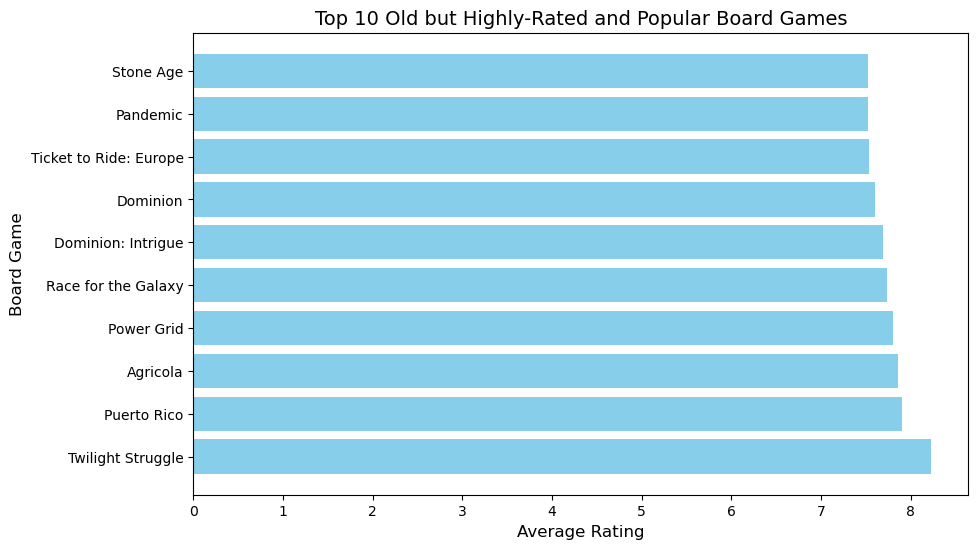

In [25]:
import matplotlib.pyplot as plt

filtered_df = df[
    (df['release_year'] < 2010) &
    (df['avg_rating'] > 7.0) &
    (df['owned'] > 50000)
]

top_games = filtered_df.sort_values('avg_rating', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_games['boardgame'], top_games['avg_rating'], color='skyblue')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Board Game', fontsize=12)
plt.title('Top 10 Old but Highly-Rated and Popular Board Games', fontsize=14)
plt.show()

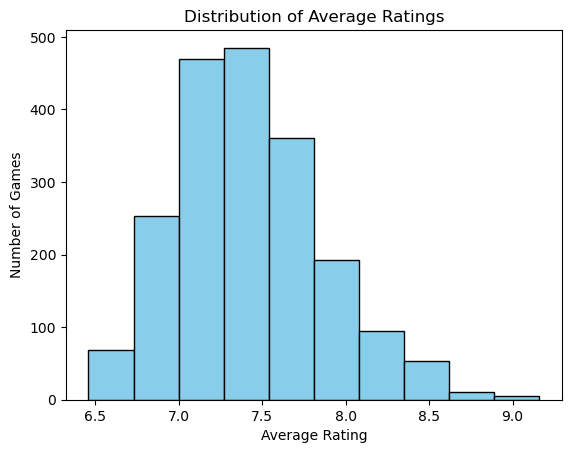

In [26]:
plt.hist(df['avg_rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Games')
plt.show()

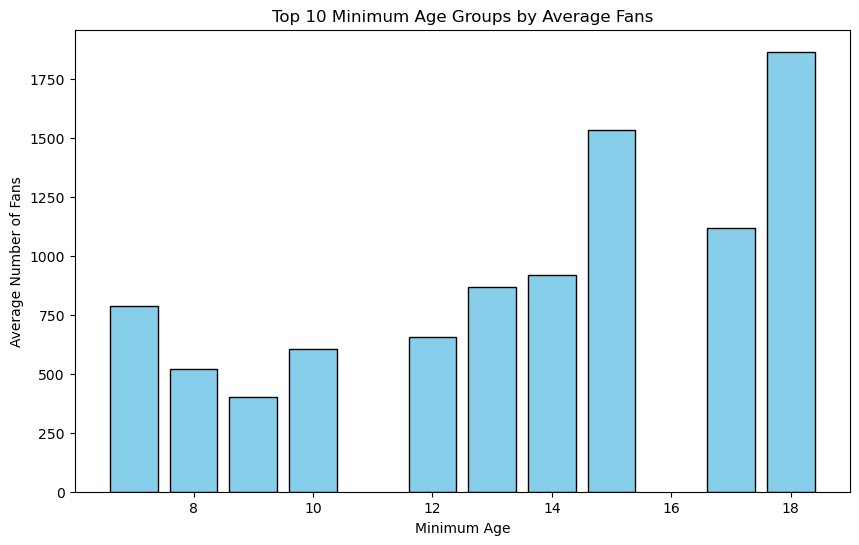

In [27]:
fans_by_age = df.groupby('minimum_age')['fans'].mean()

top_fans_by_age = fans_by_age.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_fans_by_age.index, top_fans_by_age.values, color='skyblue', edgecolor='black')
plt.title('Top 10 Minimum Age Groups by Average Fans')
plt.xlabel('Minimum Age')
plt.ylabel('Average Number of Fans')
plt.show()

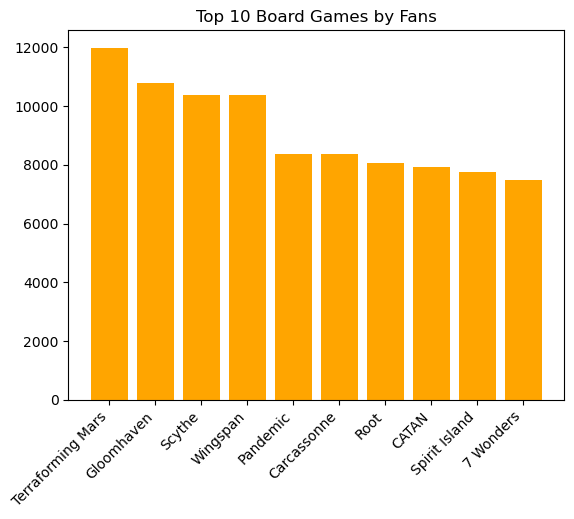

In [28]:
top_games = df.nlargest(10, 'fans')
plt.bar(top_games['boardgame'], top_games['fans'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Board Games by Fans')
plt.show()

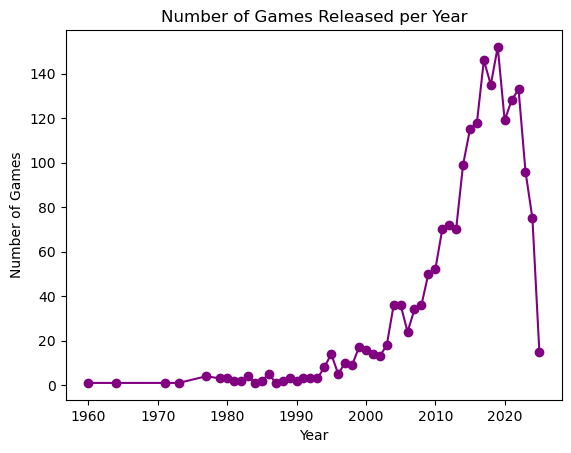

In [29]:
games_per_year = df[df['release_year'] >= 1960].groupby('release_year')['boardgame'].count()

plt.plot(games_per_year.index, games_per_year.values, marker='o', color='purple')
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation
cols = ['complexity', 'avg_rating', 'min_players', 'max_players', 
        'min_playtime', 'max_playtime', 'total_plays', 'fans', 'owned', 'page_views']

# Calculate correlation
corr = df[cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Game Attributes')
plt.show()